#What I learned

### 1. Linear gaussian system


$$ prior : \ p(\mathbf{z}) = \mathcal{N}(\mathbf{z} \mid \boldsymbol{\mu}_0, \boldsymbol{\Sigma}_0)$$$$$$
$$Likelihood: \ p(\mathbf{y} \mid \mathbf{z}) = \mathcal{N}(\mathbf{y} \mid \mathbf{Az} + \mathbf{b}, \boldsymbol{\Sigma}_y) \ (A: linear \ transform \ matrix, \ b: offset vector)$$$$$$
$$posterior: \ p(\mathbf{z} \mid \mathbf{y}) = \mathcal{N}(\mathbf{z} \mid \boldsymbol{\mu}_{z|y}, \boldsymbol{\Sigma}_{z|y})$$$$$$
$$posterior \ precision: \boldsymbol{\Sigma}_{z|y}^{-1} = \boldsymbol{\Sigma}_0^{-1} + \mathbf{A}^\top \boldsymbol{\Sigma}_y^{-1} \mathbf{A}$$$$$$
$$normalization \ constant: \ p(\mathbf{y}) = \mathcal{N}(\mathbf{y} \mid \mathbf{A}\boldsymbol{\mu}_0 + \mathbf{b}, \boldsymbol{\Sigma}_y + \mathbf{A}\boldsymbol{\Sigma}_0 \mathbf{A}^\top)$$


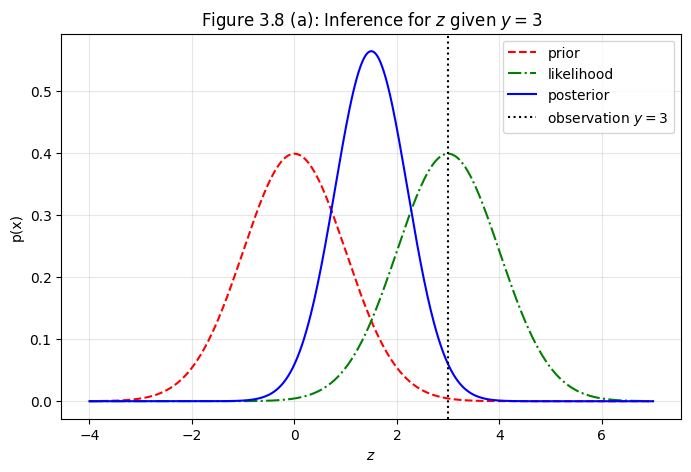

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1. 파라미터 설정
mu_0, tau_0_inv = 0, 1  # 사전 분포 평균 및 표준편차
sigma_y = 1             # 측정 노이즈 표준편차
y = 3                   # 관측치

# 2. 사후 분포(Posterior) 계산 (p. 154 정보 형태 수식 적용)
# lambda = 1/sigma^2
lambda_0 = 1 / (tau_0_inv**2)
lambda_y = 1 / (sigma_y**2)

lambda_n = lambda_0 + lambda_y
sigma_n = np.sqrt(1 / lambda_n)
mu_n = (lambda_0 * mu_0 + lambda_y * y) / lambda_n

# 3. 시각화 준비
x = np.linspace(-4, 7, 500)
prior = norm.pdf(x, mu_0, tau_0_inv)
# Likelihood p(y|z)를 z의 함수로 그림 (평균이 y인 가우시안과 같음)
likelihood = norm.pdf(x, y, sigma_y)
posterior = norm.pdf(x, mu_n, sigma_n)

# 4. 그림 그리기
plt.figure(figsize=(8, 5))
plt.plot(x, prior, 'r--', label='prior')
plt.plot(x, likelihood, 'g-.', label='likelihood')
plt.plot(x, posterior, 'b-', label='posterior')

# 관측치 y=3 표시
plt.axvline(y, color='k', linestyle=':', label='observation $y=3$')

plt.title("Figure 3.8 (a): Inference for $z$ given $y=3$")
plt.xlabel("$z$")
plt.ylabel("p(x)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()